In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df= pd.read_csv(r"C:\Users\tejas\Formoid Robotech\newupdataupto2023.csv")
df.head()

,arrival_date,temp,humidity,precip,windspeed,state,district,market,variety,min_price,max_price,modal_price
0,2020-03-01 00:00:00,15.3,76.6,0.000,13.0,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400
1,2020-04-01 00:00:00,14.3,77.2,0.000,14.8,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1400.0,1500.0,1450
2,2020-05-01 00:00:00,14.2,72.1,0.000,16.6,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1400.0,1500.0,1450
3,2020-06-01 00:00:00,14.3,76.2,0.000,13.0,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400
4,2020-07-01 00:00:00,15.1,83.0,2.581,14.8,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33933 entries, 0 to 33932
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_date  33933 non-null  object 
 1   temp          33933 non-null  float64
 2   humidity      33933 non-null  float64
 3   precip        33933 non-null  float64
 4   windspeed     33933 non-null  float64
 5   state         33933 non-null  object 
 6   district      33933 non-null  object 
 7   market        33933 non-null  object 
 8   variety       33933 non-null  object 
 9   min_price     33905 non-null  float64
 10  max_price     33905 non-null  float64
 11  modal_price   33933 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 3.1+ MB


In [72]:
df.describe()

,temp,humidity,precip,windspeed,min_price,max_price,modal_price
count,33933.000000,33933.000000,33933.000000,33933.000000,33905.000000,33905.000000,33933.000000
mean,25.425376,60.675570,3.432574,16.557431,1358.749771,1492.675210,1425.986739
std,6.939852,20.629646,11.884573,7.015025,305.806923,323.638627,311.953053
min,8.000000,7.300000,0.000000,0.300000,0.000000,0.000000,600.000000
25%,19.800000,45.500000,0.000000,11.500000,1150.000000,1250.000000,1200.000000
50%,27.400000,63.100000,0.000000,15.500000,1330.000000,1485.000000,1400.000000
75%,30.600000,78.000000,0.900000,20.500000,1600.000000,1730.000000,1660.000000
max,40.300000,99.400000,239.218000,185.400000,9020.000000,9035.000000,9025.000000


In [73]:
data2=df.copy()

In [74]:
df.isnull().sum()

arrival_date     0
temp             0
humidity         0
precip           0
windspeed        0
state            0
district         0
market           0
variety          0
min_price       28
max_price       28
modal_price      0
dtype: int64

In [75]:
df["min_price"]=df["min_price"].fillna(df["min_price"].dropna().mean())
df["min_price"].isnull().sum()

0

In [76]:
df["max_price"]=df["max_price"].fillna(df["max_price"].dropna().mean())
df["max_price"].isnull().sum()

0

In [77]:
df.isnull().sum()

arrival_date    0
temp            0
humidity        0
precip          0
windspeed       0
state           0
district        0
market          0
variety         0
min_price       0
max_price       0
modal_price     0
dtype: int64

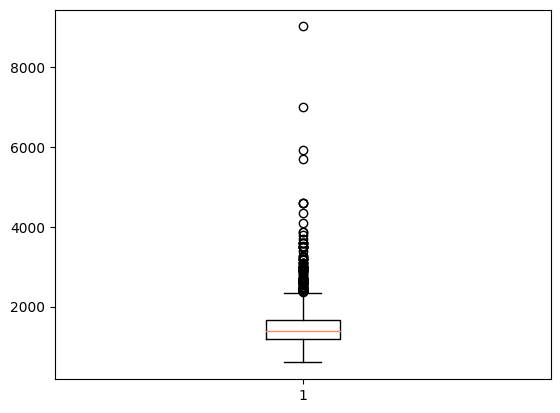

In [78]:
plt.boxplot(df['modal_price'])
plt.show()

In [79]:
# Calculate z-scores for the specified column
z_scores = (df['modal_price'] - df['modal_price'].mean()) / df['modal_price'].std()

# Define a threshold for identifying outliers
threshold = 3

# Find the outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Get a list of the outlier values
outlier_values = outliers['modal_price'].tolist()

# Sort the outlier values in ascending order
sorted_outliers = sorted(outlier_values)

# Print the sorted list of outlier values
print(sorted_outliers)


[2380, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2430, 2430, 2430, 2431, 2437, 2450, 2450, 2500, 2500, 2500, 2500, 2500, 2550, 2550, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2638, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2665, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2700, 2734, 2750, 2800, 2820, 2850, 2900, 2900, 2900, 2900, 2900, 2900, 2920, 2925, 2950, 2950, 2952, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3050, 3100, 3100, 3100, 3100, 3165, 3200, 3200, 3200, 3200, 3250, 3260, 3275, 3400, 3500, 3500, 3500, 3500, 3500, 3510, 3600, 3600, 3600, 3600, 3700, 3800, 3860, 3870, 4100, 4350, 4600, 4600, 4600, 5700, 5925, 7000, 9025]


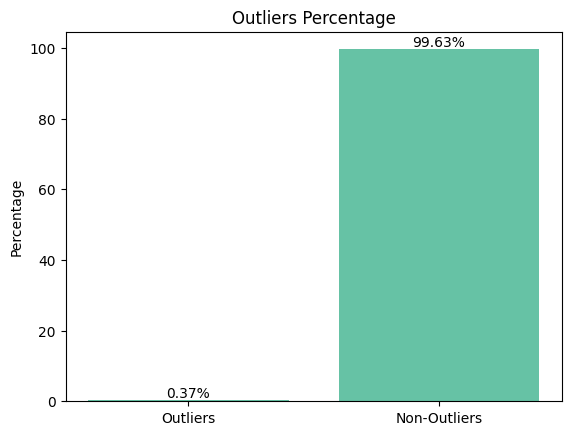

In [80]:
# Calculate z-scores for the specified column
z_scores = (df['modal_price'] - df['modal_price'].mean()) / df['modal_price'].std()

# Define a threshold for identifying outliers
threshold = 3

# Find the outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Calculate the percentage of outliers
outlier_percentage = (len(outliers) / len(df)) * 100

# Calculate the percentage of non-outliers
non_outlier_percentage = 100 - outlier_percentage

# Create a bar plot to visualize the outliers percentage-wise
plt.bar(['Outliers', 'Non-Outliers'], [outlier_percentage, non_outlier_percentage])

# Set the title and labels for the plot
plt.title('Outliers Percentage')
plt.ylabel('Percentage')

# Add text annotations for the outlier percentages
plt.text(0, outlier_percentage, f'{outlier_percentage:.2f}%', ha='center', va='bottom')
plt.text(1, non_outlier_percentage, f'{non_outlier_percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


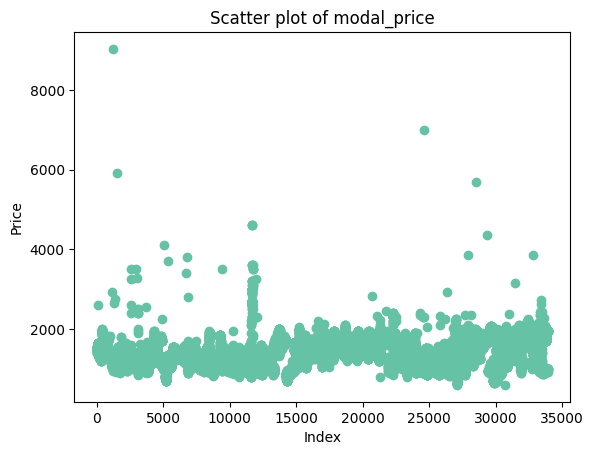

In [81]:
# Create a scatter plot of the index against 'modal_price' column
plt.scatter(df.index, df['modal_price'])

# Set the title and labels for the plot
plt.title('Scatter plot of modal_price')
plt.xlabel('Index')
plt.ylabel('Price')

# Show the plot
plt.show()


In [82]:
# Calculate z-scores for the specified column
z_scores = (df['modal_price'] - df['modal_price'].mean()) / df['modal_price'].std()

# Define a threshold for identifying outliers
threshold = 3

# Remove outliers based on the threshold
df_no_outliers = df[abs(z_scores) <= threshold]


In [83]:
df_no_outliers.head()

,arrival_date,temp,humidity,precip,windspeed,state,district,market,variety,min_price,max_price,modal_price
0,2020-03-01 00:00:00,15.3,76.6,0.000,13.0,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400
1,2020-04-01 00:00:00,14.3,77.2,0.000,14.8,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1400.0,1500.0,1450
2,2020-05-01 00:00:00,14.2,72.1,0.000,16.6,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1400.0,1500.0,1450
3,2020-06-01 00:00:00,14.3,76.2,0.000,13.0,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400
4,2020-07-01 00:00:00,15.1,83.0,2.581,14.8,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400


In [84]:
df_no_outliers['district'].unique()

array(['gautam budh nagar', 'deoria', 'siddharth nagar', 'badaun',
       'saharanpur', 'gonda', 'bijnor', 'balrampur', 'basti', 'sultanpur',
       'muradabad', 'gorakhpur', 'maharajganj', 'bulandshahar', 'meerut',
       'muzaffarnagar', 'ghaziabad', 'etah', 'barabanki'], dtype=object)

In [85]:
df_no_outliers['market'].unique()

array(['dadri', 'devariya', 'sahiyapur', 'shahaswan', 'ujhani', 'naugarh',
       'saharanpur', 'gonda', 'bijnaur', 'balrampur', 'basti',
       'sultanpur', 'muradabad', 'chorichora', 'gadaura', 'gorakhpur',
       'maharajganj', 'sehjanwa', 'anandnagar', 'buland shahr',
       'sardhana', 'meerut', 'parikshitgarh', 'jahangirabad', 'mawana',
       'shamli', 'noida', 'muzzafarnagar', 'hapur', 'ghaziabad',
       'khatauli', 'aliganj', 'awagarh', 'ganjdudwara', 'kasganj',
       'barabanki', 'rudauli', 'safdarganj', 'rampurmaniharan', 'devband',
       'gangoh', 'karnailganj', 'Bijnaur', 'Kiratpur', 'Najibabad',
       'Basti', 'Barabanki', 'Rudauli', 'Safdarganj', 'Balrampur',
       'Tulsipur', 'Badayoun', 'Shahaswan', 'Muradabad', 'Chandausi',
       'Sardhana', 'Meerut', 'Mawana', 'Anandnagar', 'Nautnava',
       'Gadaura', 'Chorichora', 'Gorakhpur', 'Sehjanwa', 'Nawabganj',
       'Gonda', 'Awagarh', 'Etah', 'Kasganj', 'Dadri', 'Dankaur',
       'Barhaj', 'Devariya', 'Ghaziabad', 

In [86]:
len(df_no_outliers)

33808

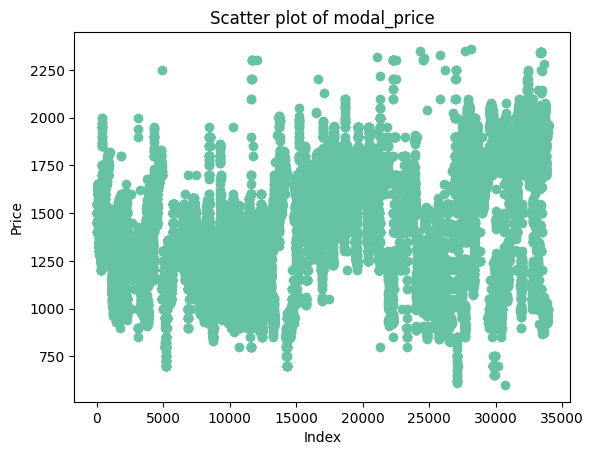

In [87]:
plt.scatter(df_no_outliers.index, df_no_outliers['modal_price'])

# Set the title and labels for the plot
plt.title('Scatter plot of modal_price')
plt.xlabel('Index')
plt.ylabel('Price')

# Show the plot
plt.show()


In [88]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], dayfirst=True)
df['year'] = pd.to_datetime(df['arrival_date']).dt.year
df['month'] = pd.to_datetime(df['arrival_date']).dt.month
df['day'] = pd.to_datetime(df['arrival_date']).dt.day
df['weekday'] = pd.to_datetime(df['arrival_date']).dt.weekday
df['week_of_year'] = pd.to_datetime(df['arrival_date']).dt.isocalendar().week

In [89]:
df.head()

,arrival_date,temp,humidity,precip,windspeed,state,district,market,variety,min_price,max_price,modal_price,year,month,day,weekday,week_of_year
0,2020-03-01,15.3,76.6,0.000,13.0,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400,2020,3,1,6,9
1,2020-04-01,14.3,77.2,0.000,14.8,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1400.0,1500.0,1450,2020,4,1,2,14
2,2020-05-01,14.2,72.1,0.000,16.6,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1400.0,1500.0,1450,2020,5,1,4,18
3,2020-06-01,14.3,76.2,0.000,13.0,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400,2020,6,1,0,23
4,2020-07-01,15.1,83.0,2.581,14.8,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400,2020,7,1,2,27


In [90]:
df.shape

(33933, 17)

In [91]:
df['seasons'] = df['month'].map({
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'autumn',
    10: 'autumn',
    11: 'autumn',
    12: 'winter'
})

In [92]:
df1=df.copy()


In [93]:
df.head()

,arrival_date,temp,humidity,precip,windspeed,state,district,market,variety,min_price,max_price,modal_price,year,month,day,weekday,week_of_year,seasons
0,2020-03-01,15.3,76.6,0.000,13.0,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400,2020,3,1,6,9,spring
1,2020-04-01,14.3,77.2,0.000,14.8,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1400.0,1500.0,1450,2020,4,1,2,14,spring
2,2020-05-01,14.2,72.1,0.000,16.6,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1400.0,1500.0,1450,2020,5,1,4,18,spring
3,2020-06-01,14.3,76.2,0.000,13.0,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400,2020,6,1,0,23,summer
4,2020-07-01,15.1,83.0,2.581,14.8,Uttar Pradesh,gautam budh nagar,dadri,Banana - Green,1350.0,1450.0,1400,2020,7,1,2,27,summer


In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
label_encoder_state=LabelEncoder()
df1['state']=label_encoder_state.fit_transform(df1['state'])

In [96]:
label_encoder_district=LabelEncoder()
df1['district']=label_encoder_state.fit_transform(df1['district'])

In [97]:
label_encoder_market=LabelEncoder()
df1['market']=label_encoder_state.fit_transform(df1['market'])

In [98]:
label_encoder_variety=LabelEncoder()
df1['variety']=label_encoder_state.fit_transform(df1['variety'])

In [99]:
label_encoder_seasons=LabelEncoder()
df1['seasons']=label_encoder_state.fit_transform(df1['seasons'])

In [100]:
df1.head()

,arrival_date,temp,humidity,precip,windspeed,state,district,market,variety,min_price,max_price,modal_price,year,month,day,weekday,week_of_year,seasons
0,2020-03-01,15.3,76.6,0.000,13.0,0,8,53,0,1350.0,1450.0,1400,2020,3,1,6,9,1
1,2020-04-01,14.3,77.2,0.000,14.8,0,8,53,0,1400.0,1500.0,1450,2020,4,1,2,14,1
2,2020-05-01,14.2,72.1,0.000,16.6,0,8,53,0,1400.0,1500.0,1450,2020,5,1,4,18,1
3,2020-06-01,14.3,76.2,0.000,13.0,0,8,53,0,1350.0,1450.0,1400,2020,6,1,0,23,2
4,2020-07-01,15.1,83.0,2.581,14.8,0,8,53,0,1350.0,1450.0,1400,2020,7,1,2,27,2


In [101]:
df1.insert(7,'temp',df1.pop('temp'))
df1.insert(7,'humidity',df1.pop('humidity'))
df1.insert(7,'precip',df1.pop('precip'))
df1.insert(7,'windspeed',df1.pop('windspeed'))
df1.insert(13,'modal_price',df1.pop('modal_price'))

In [102]:
df1=df1.drop(['arrival_date'],axis=1)
df1.head()

,state,district,market,temp,humidity,precip,windspeed,variety,min_price,max_price,year,month,modal_price,day,weekday,week_of_year,seasons
0,0,8,53,15.3,76.6,0.000,13.0,0,1350.0,1450.0,2020,3,1400,1,6,9,1
1,0,8,53,14.3,77.2,0.000,14.8,0,1400.0,1500.0,2020,4,1450,1,2,14,1
2,0,8,53,14.2,72.1,0.000,16.6,0,1400.0,1500.0,2020,5,1450,1,4,18,1
3,0,8,53,14.3,76.2,0.000,13.0,0,1350.0,1450.0,2020,6,1400,1,0,23,2
4,0,8,53,15.1,83.0,2.581,14.8,0,1350.0,1450.0,2020,7,1400,1,2,27,2


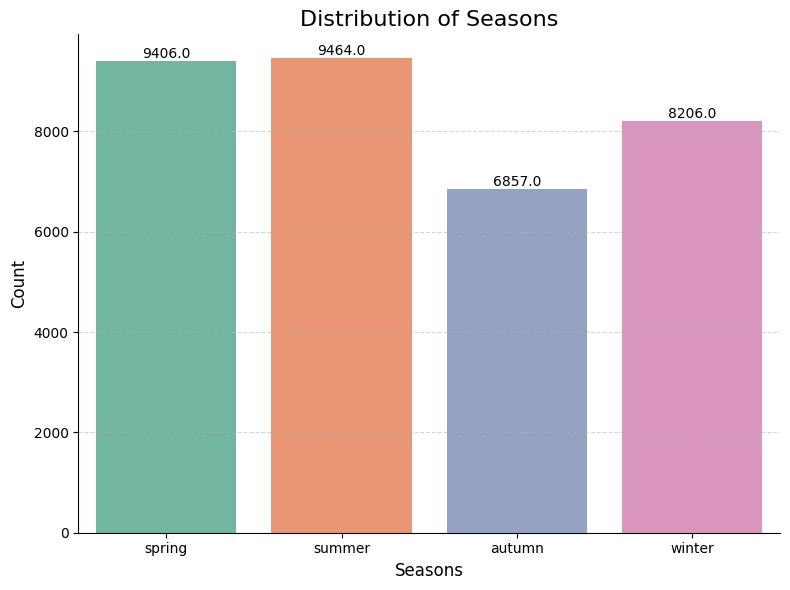

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for the countplot
custom_palette = sns.color_palette("Set2")
sns.set_palette(custom_palette)

# Create the countplot
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.countplot(data=df, x='seasons')

# Add labels and title
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Seasons', fontsize=16)

# Add data labels on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

# Customize the grid and remove the top and right spines
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


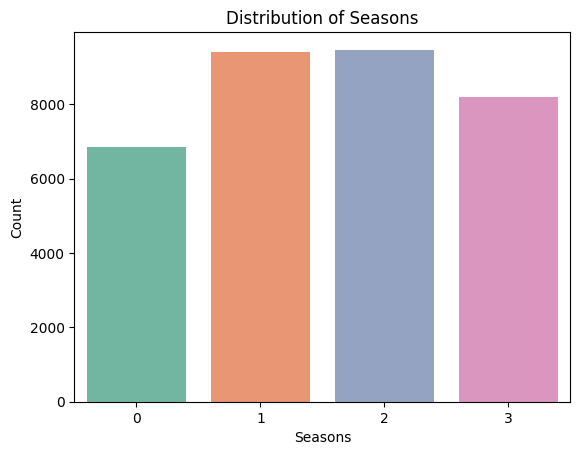

In [104]:
sns.countplot(data=df1, x='seasons', palette='Set2')

# Add labels and title
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Distribution of Seasons')

# Display the plot
plt.show()

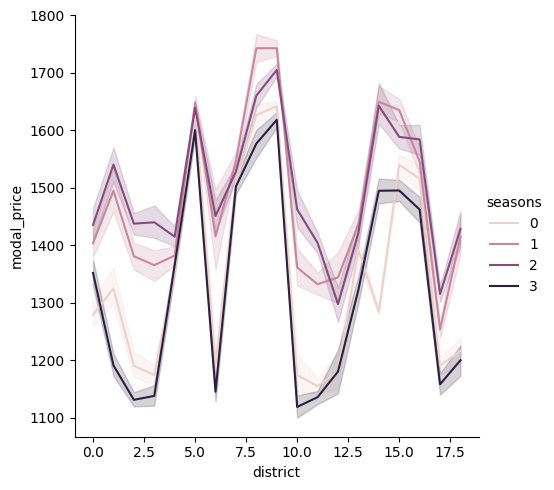

In [105]:
import plotly.express as px
sns.relplot(data=df1,x='district',y='modal_price',hue='seasons',kind='line')

In [106]:
import plotly.express as px
import pandas as pd

# Assuming your dataset is named 'df' with the provided columns

# Group the data by 'seasons' and calculate the mean modal price for each season
seasonal_mean_prices = df.groupby('seasons')['modal_price'].mean().reset_index()

# Create the line chart
fig = px.line(seasonal_mean_prices, x='seasons', y='modal_price',
              labels={'seasons': 'Seasons', 'modal_price': 'Mean Modal Price'},
              title='Mean Modal Price Variation by Seasons')

fig.update_layout(
    xaxis=dict(title='Seasons'),
    yaxis=dict(title='Mean Modal Price'),
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_gridcolor='lightgray',
    yaxis_gridcolor='lightgray',
    plot_bgcolor='white',  # Set the plot background color
    legend=dict(title='Legend', bgcolor='lightgray', bordercolor='gray', borderwidth=1)
)

fig.update_traces(mode='lines+markers')  # Add markers to data points for better visibility

fig.show()



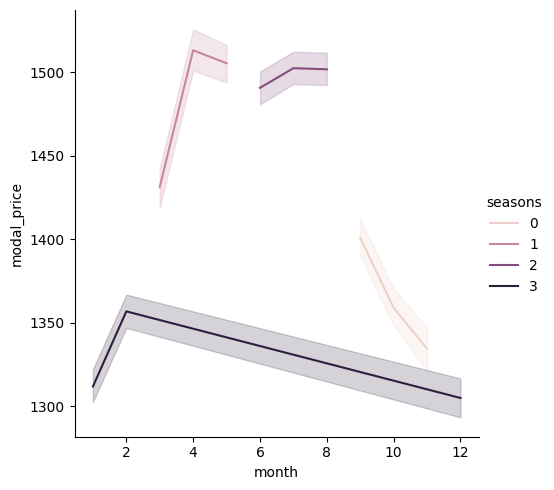

In [107]:
import plotly.express as px
sns.relplot(data=df1,x='month',y='modal_price',hue='seasons',kind='line')

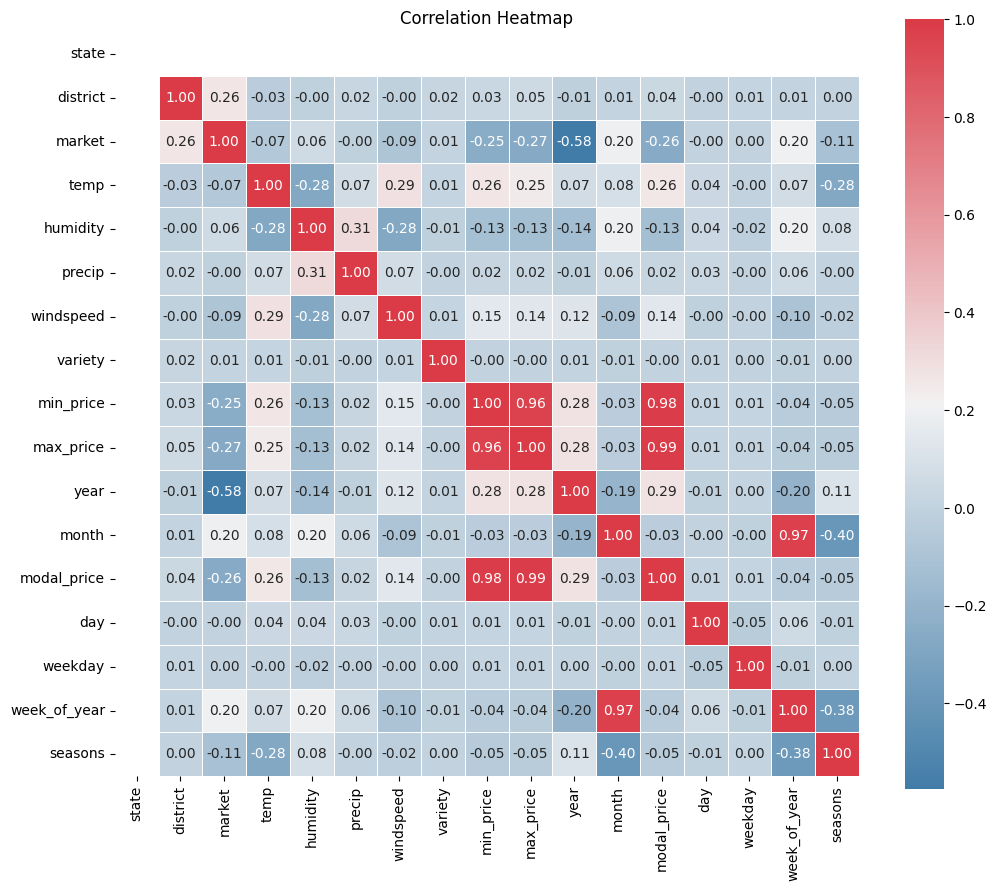

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df1.corr()

# Create a figure and axis
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Create a diverging color palette
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap with customizations
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",  # Format the annotations with two decimal places
    cmap=cmap,  # Use the custom color palette
    cbar=True,  # Show the color bar
    square=True,  # Make the cells square
    linewidths=0.5,  # Add a border between cells
    ax=ax,  # Use the defined axis
)

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


In [109]:
df1.head()

,state,district,market,temp,humidity,precip,windspeed,variety,min_price,max_price,year,month,modal_price,day,weekday,week_of_year,seasons
0,0,8,53,15.3,76.6,0.000,13.0,0,1350.0,1450.0,2020,3,1400,1,6,9,1
1,0,8,53,14.3,77.2,0.000,14.8,0,1400.0,1500.0,2020,4,1450,1,2,14,1
2,0,8,53,14.2,72.1,0.000,16.6,0,1400.0,1500.0,2020,5,1450,1,4,18,1
3,0,8,53,14.3,76.2,0.000,13.0,0,1350.0,1450.0,2020,6,1400,1,0,23,2
4,0,8,53,15.1,83.0,2.581,14.8,0,1350.0,1450.0,2020,7,1400,1,2,27,2


In [110]:
df1.insert(3,'variety',df1.pop('variety'))

In [112]:
df1.insert(10,'modal_price',df1.pop('modal_price'))

In [113]:
df1.head()

,state,district,market,variety,temp,humidity,precip,windspeed,min_price,max_price,modal_price,year,month,day,weekday,week_of_year,seasons
0,0,8,53,0,15.3,76.6,0.000,13.0,1350.0,1450.0,1400,2020,3,1,6,9,1
1,0,8,53,0,14.3,77.2,0.000,14.8,1400.0,1500.0,1450,2020,4,1,2,14,1
2,0,8,53,0,14.2,72.1,0.000,16.6,1400.0,1500.0,1450,2020,5,1,4,18,1
3,0,8,53,0,14.3,76.2,0.000,13.0,1350.0,1450.0,1400,2020,6,1,0,23,2
4,0,8,53,0,15.1,83.0,2.581,14.8,1350.0,1450.0,1400,2020,7,1,2,27,2


In [42]:
df1 = df1.drop(['year'], axis=1)

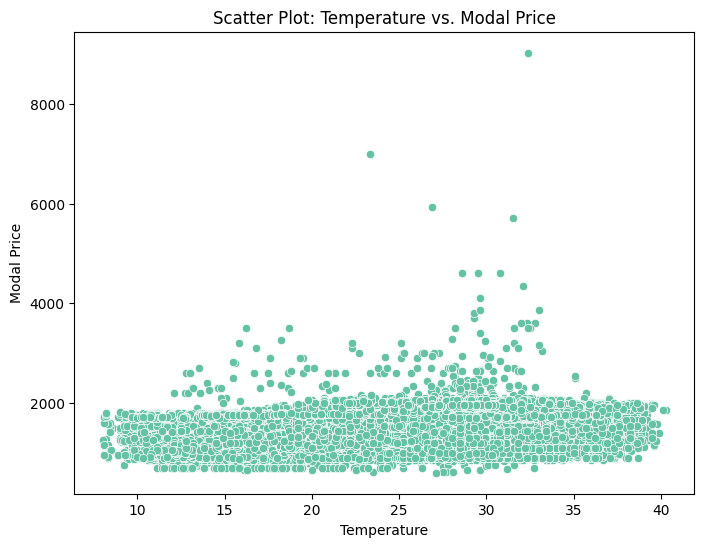

In [118]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='temp', y='modal_price')
plt.title('Scatter Plot: Temperature vs. Modal Price')
plt.xlabel('Temperature')
plt.ylabel('Modal Price')
plt.show()

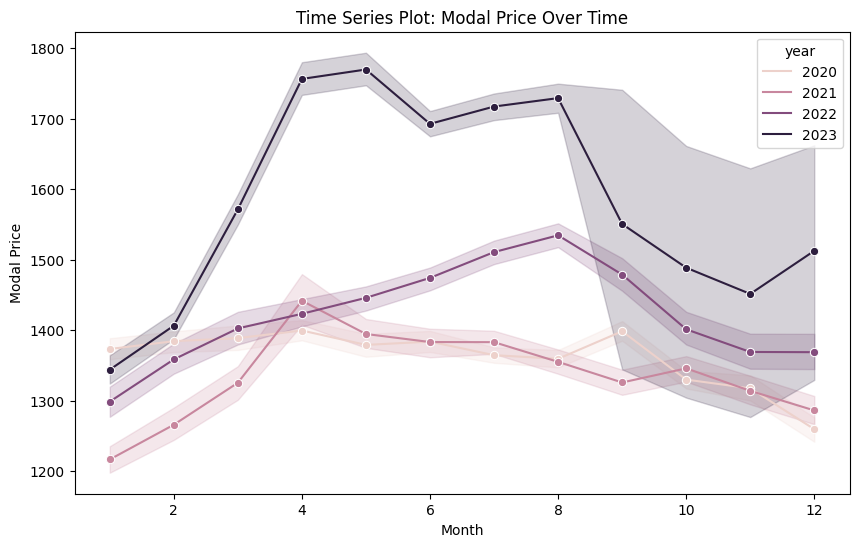

In [115]:
# Time Series Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='month', y='modal_price', hue='year', marker='o')
plt.title('Time Series Plot: Modal Price Over Time')
plt.xlabel('Month')
plt.ylabel('Modal Price')
plt.show()

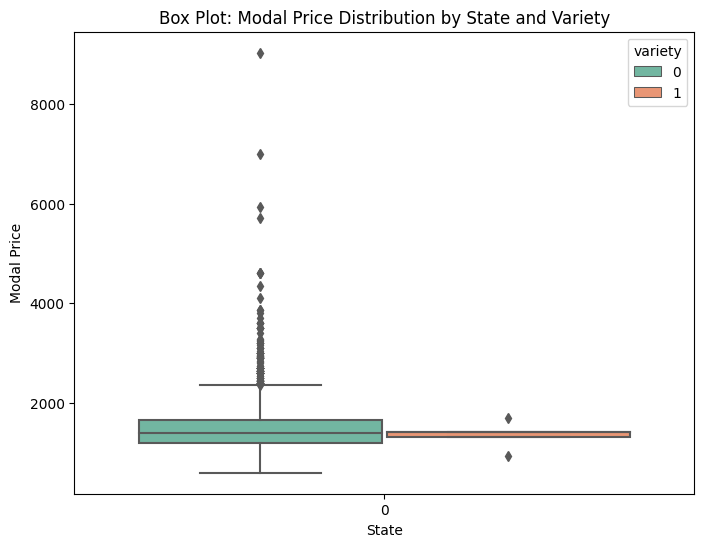

In [116]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='state', y='modal_price', hue='variety')
plt.title('Box Plot: Modal Price Distribution by State and Variety')
plt.xlabel('State')
plt.ylabel('Modal Price')
plt.show()

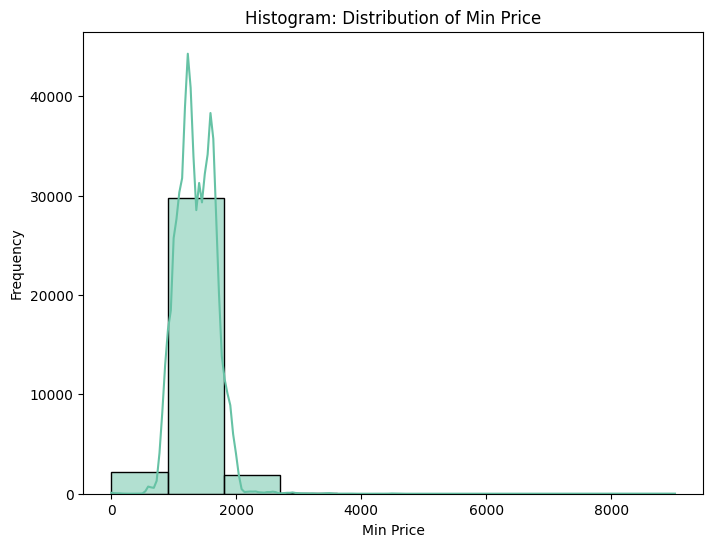

In [117]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='min_price', bins=10, kde=True)
plt.title('Histogram: Distribution of Min Price')
plt.xlabel('Min Price')
plt.ylabel('Frequency')
plt.show()

In [43]:
df1.columns

Index(['state', 'district', 'market', 'variety', 'temp', 'humidity', 'precip',
       'windspeed', 'min_price', 'max_price', 'modal_price', 'month', 'day',
       'weekday', 'week_of_year', 'seasons'],
      dtype='object')

In [44]:
# Separate features (X) and target variable (y)
X = df1.drop(['modal_price','max_price','min_price'], axis=1)
y = df1[['modal_price','max_price','min_price']]

In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((27146, 13), (27146, 3), (6787, 13), (6787, 3))

In [47]:
from sklearn.multioutput import MultiOutputRegressor
from flaml import AutoML

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

# AutoML

In [49]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [51]:
automl = AutoML(task="regression", time_budget=60)
base_regressor = MultiOutputRegressor(automl)  # Wrapping AutoML in MultiOutputRegressor
cv_scores = cross_val_score(base_regressor, X_train, y_train, cv=5, scoring=make_scorer(r2_score))
mean_cv_score = np.mean(cv_scores)
base_regressor.fit(X_train, y_train)

[flaml.automl.logger: 09-08 22:54:09] {1679} INFO - task = regression
[flaml.automl.logger: 09-08 22:54:09] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-08 22:54:09] {1788} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 09-08 22:54:09] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 09-08 22:54:09] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 09-08 22:54:09] {2344} INFO - Estimated sufficient time budget=1212s. Estimated necessary time budget=9s.
[flaml.automl.logger: 09-08 22:54:09] {2391} INFO -  at 0.2s,	estimator lgbm's best error=0.8959,	best estimator lgbm's best error=0.8959
[flaml.automl.logger: 09-08 22:54:09] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-08 22:54:09] {2391} INFO -  at 0.3s,	estimator lgbm's best error=0.8959,	best estimator lgbm's best error=0.8959
[flaml.automl.logger: 09-08 22:54:09] {2218} INF

[flaml.automl.logger: 09-08 22:54:20] {2218} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 09-08 22:54:21] {2391} INFO -  at 11.8s,	estimator lgbm's best error=0.1958,	best estimator lgbm's best error=0.1958
[flaml.automl.logger: 09-08 22:54:21] {2218} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 09-08 22:54:21] {2391} INFO -  at 12.1s,	estimator xgboost's best error=0.2479,	best estimator lgbm's best error=0.1958
[flaml.automl.logger: 09-08 22:54:21] {2218} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 09-08 22:54:21] {2391} INFO -  at 12.4s,	estimator extra_tree's best error=0.3351,	best estimator lgbm's best error=0.1958
[flaml.automl.logger: 09-08 22:54:21] {2218} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 09-08 22:54:21] {2391} INFO -  at 12.6s,	estimator xgboost's best error=0.2479,	best estimator lgbm's best error=0.1958
[flaml.automl.logger: 09-08 22:54:21] {2218} INFO - iteration 38, curren

[flaml.automl.logger: 09-08 22:54:43] {2218} INFO - iteration 70, current learner xgboost
[flaml.automl.logger: 09-08 22:54:44] {2391} INFO -  at 35.6s,	estimator xgboost's best error=0.1725,	best estimator xgboost's best error=0.1725
[flaml.automl.logger: 09-08 22:54:44] {2218} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 09-08 22:54:45] {2391} INFO -  at 36.5s,	estimator xgboost's best error=0.1725,	best estimator xgboost's best error=0.1725
[flaml.automl.logger: 09-08 22:54:45] {2218} INFO - iteration 72, current learner extra_tree
[flaml.automl.logger: 09-08 22:54:46] {2391} INFO -  at 37.0s,	estimator extra_tree's best error=0.2559,	best estimator xgboost's best error=0.1725
[flaml.automl.logger: 09-08 22:54:46] {2218} INFO - iteration 73, current learner xgboost
[flaml.automl.logger: 09-08 22:54:48] {2391} INFO -  at 39.4s,	estimator xgboost's best error=0.1725,	best estimator xgboost's best error=0.1725
[flaml.automl.logger: 09-08 22:54:48] {2218} INFO - it

[flaml.automl.logger: 09-08 22:55:12] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-08 22:55:12] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.3971,	best estimator lgbm's best error=0.3971
[flaml.automl.logger: 09-08 22:55:12] {2218} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 09-08 22:55:12] {2391} INFO -  at 1.5s,	estimator lgbm's best error=0.3971,	best estimator lgbm's best error=0.3971
[flaml.automl.logger: 09-08 22:55:12] {2218} INFO - iteration 11, current learner rf
[flaml.automl.logger: 09-08 22:55:13] {2391} INFO -  at 1.9s,	estimator rf's best error=0.5174,	best estimator lgbm's best error=0.3971
[flaml.automl.logger: 09-08 22:55:13] {2218} INFO - iteration 12, current learner rf
[flaml.automl.logger: 09-08 22:55:13] {2391} INFO -  at 2.2s,	estimator rf's best error=0.5174,	best estimator lgbm's best error=0.3971
[flaml.automl.logger: 09-08 22:55:13] {2218} INFO - iteration 13, current learner xgboost
[flaml.automl.logge

[flaml.automl.logger: 09-08 22:55:27] {2218} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 09-08 22:55:27] {2391} INFO -  at 16.2s,	estimator xgboost's best error=0.2583,	best estimator lgbm's best error=0.1914
[flaml.automl.logger: 09-08 22:55:27] {2218} INFO - iteration 46, current learner rf
[flaml.automl.logger: 09-08 22:55:28] {2391} INFO -  at 17.2s,	estimator rf's best error=0.2168,	best estimator lgbm's best error=0.1914
[flaml.automl.logger: 09-08 22:55:28] {2218} INFO - iteration 47, current learner xgboost
[flaml.automl.logger: 09-08 22:55:28] {2391} INFO -  at 17.5s,	estimator xgboost's best error=0.2583,	best estimator lgbm's best error=0.1914
[flaml.automl.logger: 09-08 22:55:28] {2218} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 09-08 22:55:29] {2391} INFO -  at 17.9s,	estimator lgbm's best error=0.1914,	best estimator lgbm's best error=0.1914
[flaml.automl.logger: 09-08 22:55:29] {2218} INFO - iteration 49, current learner rf
[fl

[flaml.automl.logger: 09-08 22:56:05] {2391} INFO -  at 54.3s,	estimator rf's best error=0.2066,	best estimator xgboost's best error=0.1804
[flaml.automl.logger: 09-08 22:56:05] {2218} INFO - iteration 81, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:56:05] {2391} INFO -  at 54.6s,	estimator xgb_limitdepth's best error=0.2450,	best estimator xgboost's best error=0.1804
[flaml.automl.logger: 09-08 22:56:05] {2218} INFO - iteration 82, current learner extra_tree
[flaml.automl.logger: 09-08 22:56:06] {2391} INFO -  at 55.0s,	estimator extra_tree's best error=0.2629,	best estimator xgboost's best error=0.1804
[flaml.automl.logger: 09-08 22:56:06] {2218} INFO - iteration 83, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:56:06] {2391} INFO -  at 55.2s,	estimator xgb_limitdepth's best error=0.2450,	best estimator xgboost's best error=0.1804
[flaml.automl.logger: 09-08 22:56:06] {2218} INFO - iteration 84, current learner xgb_limitdepth
[flaml.automl.logger: 09

[flaml.automl.logger: 09-08 22:56:16] {2218} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 09-08 22:56:16] {2391} INFO -  at 3.4s,	estimator lgbm's best error=0.3593,	best estimator rf's best error=0.3329
[flaml.automl.logger: 09-08 22:56:16] {2218} INFO - iteration 17, current learner extra_tree
[flaml.automl.logger: 09-08 22:56:16] {2391} INFO -  at 3.6s,	estimator extra_tree's best error=0.6854,	best estimator rf's best error=0.3329
[flaml.automl.logger: 09-08 22:56:16] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 09-08 22:56:16] {2391} INFO -  at 3.7s,	estimator lgbm's best error=0.3593,	best estimator rf's best error=0.3329
[flaml.automl.logger: 09-08 22:56:16] {2218} INFO - iteration 19, current learner xgboost
[flaml.automl.logger: 09-08 22:56:16] {2391} INFO -  at 3.9s,	estimator xgboost's best error=2.5877,	best estimator rf's best error=0.3329
[flaml.automl.logger: 09-08 22:56:16] {2218} INFO - iteration 20, current learner rf
[flam

[flaml.automl.logger: 09-08 22:56:31] {2391} INFO -  at 18.3s,	estimator lgbm's best error=0.2079,	best estimator lgbm's best error=0.2079
[flaml.automl.logger: 09-08 22:56:31] {2218} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 09-08 22:56:33] {2391} INFO -  at 20.5s,	estimator lgbm's best error=0.2079,	best estimator lgbm's best error=0.2079
[flaml.automl.logger: 09-08 22:56:33] {2218} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 09-08 22:56:34] {2391} INFO -  at 21.3s,	estimator lgbm's best error=0.2053,	best estimator lgbm's best error=0.2053
[flaml.automl.logger: 09-08 22:56:34] {2218} INFO - iteration 55, current learner xgboost
[flaml.automl.logger: 09-08 22:56:34] {2391} INFO -  at 21.5s,	estimator xgboost's best error=0.2569,	best estimator lgbm's best error=0.2053
[flaml.automl.logger: 09-08 22:56:34] {2218} INFO - iteration 56, current learner rf
[flaml.automl.logger: 09-08 22:56:35] {2391} INFO -  at 22.7s,	estimator rf's best error=0.2

[flaml.automl.logger: 09-08 22:57:11] {2218} INFO - iteration 88, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:57:12] {2391} INFO -  at 59.1s,	estimator xgb_limitdepth's best error=0.2423,	best estimator rf's best error=0.1854
[flaml.automl.logger: 09-08 22:57:12] {2218} INFO - iteration 89, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:57:12] {2391} INFO -  at 59.3s,	estimator xgb_limitdepth's best error=0.2423,	best estimator rf's best error=0.1854
[flaml.automl.logger: 09-08 22:57:12] {2218} INFO - iteration 90, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:57:12] {2391} INFO -  at 59.7s,	estimator xgb_limitdepth's best error=0.2423,	best estimator rf's best error=0.1854
[flaml.automl.logger: 09-08 22:57:12] {2218} INFO - iteration 91, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:57:12] {2391} INFO -  at 59.9s,	estimator xgb_limitdepth's best error=0.2423,	best estimator rf's best error=0.1854
[flaml.automl.logger: 09

[flaml.automl.logger: 09-08 22:57:25] {2218} INFO - iteration 28, current learner extra_tree
[flaml.automl.logger: 09-08 22:57:25] {2391} INFO -  at 7.9s,	estimator extra_tree's best error=0.2902,	best estimator rf's best error=0.2085
[flaml.automl.logger: 09-08 22:57:25] {2218} INFO - iteration 29, current learner extra_tree
[flaml.automl.logger: 09-08 22:57:25] {2391} INFO -  at 8.3s,	estimator extra_tree's best error=0.2527,	best estimator rf's best error=0.2085
[flaml.automl.logger: 09-08 22:57:25] {2218} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 09-08 22:57:26] {2391} INFO -  at 8.4s,	estimator lgbm's best error=0.3259,	best estimator rf's best error=0.2085
[flaml.automl.logger: 09-08 22:57:26] {2218} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 09-08 22:57:26] {2391} INFO -  at 8.9s,	estimator lgbm's best error=0.1837,	best estimator lgbm's best error=0.1837
[flaml.automl.logger: 09-08 22:57:26] {2218} INFO - iteration 32, current learner 

[flaml.automl.logger: 09-08 22:57:57] {2218} INFO - iteration 64, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:57:57] {2391} INFO -  at 40.3s,	estimator xgb_limitdepth's best error=0.2279,	best estimator lgbm's best error=0.1390
[flaml.automl.logger: 09-08 22:57:57] {2218} INFO - iteration 65, current learner lgbm
[flaml.automl.logger: 09-08 22:57:58] {2391} INFO -  at 40.8s,	estimator lgbm's best error=0.1390,	best estimator lgbm's best error=0.1390
[flaml.automl.logger: 09-08 22:57:58] {2218} INFO - iteration 66, current learner xgboost
[flaml.automl.logger: 09-08 22:57:58] {2391} INFO -  at 41.2s,	estimator xgboost's best error=0.2162,	best estimator lgbm's best error=0.1390
[flaml.automl.logger: 09-08 22:57:58] {2218} INFO - iteration 67, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:57:59] {2391} INFO -  at 41.5s,	estimator xgb_limitdepth's best error=0.2279,	best estimator lgbm's best error=0.1390
[flaml.automl.logger: 09-08 22:57:59] {2218} INFO 

[flaml.automl.logger: 09-08 22:58:20] {2218} INFO - iteration 13, current learner rf
[flaml.automl.logger: 09-08 22:58:21] {2391} INFO -  at 2.1s,	estimator rf's best error=0.7716,	best estimator lgbm's best error=0.3408
[flaml.automl.logger: 09-08 22:58:21] {2218} INFO - iteration 14, current learner rf
[flaml.automl.logger: 09-08 22:58:21] {2391} INFO -  at 2.4s,	estimator rf's best error=0.4669,	best estimator lgbm's best error=0.3408
[flaml.automl.logger: 09-08 22:58:21] {2218} INFO - iteration 15, current learner rf
[flaml.automl.logger: 09-08 22:58:21] {2391} INFO -  at 2.7s,	estimator rf's best error=0.4669,	best estimator lgbm's best error=0.3408
[flaml.automl.logger: 09-08 22:58:21] {2218} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 09-08 22:58:21] {2391} INFO -  at 2.9s,	estimator lgbm's best error=0.3408,	best estimator lgbm's best error=0.3408
[flaml.automl.logger: 09-08 22:58:21] {2218} INFO - iteration 17, current learner extra_tree
[flaml.automl.logge

[flaml.automl.logger: 09-08 22:58:36] {2218} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 09-08 22:58:37] {2391} INFO -  at 18.1s,	estimator lgbm's best error=0.1712,	best estimator lgbm's best error=0.1712
[flaml.automl.logger: 09-08 22:58:37] {2218} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 09-08 22:58:37] {2391} INFO -  at 18.6s,	estimator extra_tree's best error=0.2503,	best estimator lgbm's best error=0.1712
[flaml.automl.logger: 09-08 22:58:37] {2218} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 09-08 22:58:39] {2391} INFO -  at 20.7s,	estimator lgbm's best error=0.1712,	best estimator lgbm's best error=0.1712
[flaml.automl.logger: 09-08 22:58:39] {2218} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 09-08 22:58:40] {2391} INFO -  at 21.4s,	estimator lgbm's best error=0.1712,	best estimator lgbm's best error=0.1712
[flaml.automl.logger: 09-08 22:58:40] {2218} INFO - iteration 53, current learner xg

[flaml.automl.logger: 09-08 22:59:16] {2218} INFO - iteration 84, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:59:16] {2391} INFO -  at 57.9s,	estimator xgb_limitdepth's best error=0.2135,	best estimator lgbm's best error=0.1708
[flaml.automl.logger: 09-08 22:59:16] {2218} INFO - iteration 85, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:59:17] {2391} INFO -  at 58.4s,	estimator xgb_limitdepth's best error=0.2135,	best estimator lgbm's best error=0.1708
[flaml.automl.logger: 09-08 22:59:17] {2218} INFO - iteration 86, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 22:59:18] {2391} INFO -  at 59.4s,	estimator xgb_limitdepth's best error=0.2073,	best estimator lgbm's best error=0.1708
[flaml.automl.logger: 09-08 22:59:18] {2218} INFO - iteration 87, current learner xgboost
[flaml.automl.logger: 09-08 22:59:18] {2391} INFO -  at 59.9s,	estimator xgboost's best error=0.2386,	best estimator lgbm's best error=0.1708
[flaml.automl.logger: 09-08 22

[flaml.automl.logger: 09-08 22:59:26] {2391} INFO -  at 6.7s,	estimator xgboost's best error=0.3725,	best estimator rf's best error=0.2208
[flaml.automl.logger: 09-08 22:59:26] {2218} INFO - iteration 28, current learner extra_tree
[flaml.automl.logger: 09-08 22:59:27] {2391} INFO -  at 7.1s,	estimator extra_tree's best error=0.3079,	best estimator rf's best error=0.2208
[flaml.automl.logger: 09-08 22:59:27] {2218} INFO - iteration 29, current learner extra_tree
[flaml.automl.logger: 09-08 22:59:27] {2391} INFO -  at 7.5s,	estimator extra_tree's best error=0.3079,	best estimator rf's best error=0.2208
[flaml.automl.logger: 09-08 22:59:27] {2218} INFO - iteration 30, current learner rf
[flaml.automl.logger: 09-08 22:59:28] {2391} INFO -  at 8.5s,	estimator rf's best error=0.2037,	best estimator rf's best error=0.2037
[flaml.automl.logger: 09-08 22:59:28] {2218} INFO - iteration 31, current learner rf
[flaml.automl.logger: 09-08 22:59:29] {2391} INFO -  at 9.4s,	estimator rf's best error

[flaml.automl.logger: 09-08 22:59:49] {2218} INFO - iteration 63, current learner xgboost
[flaml.automl.logger: 09-08 22:59:50] {2391} INFO -  at 30.3s,	estimator xgboost's best error=0.2349,	best estimator rf's best error=0.1660
[flaml.automl.logger: 09-08 22:59:50] {2218} INFO - iteration 64, current learner extra_tree
[flaml.automl.logger: 09-08 22:59:50] {2391} INFO -  at 30.7s,	estimator extra_tree's best error=0.2601,	best estimator rf's best error=0.1660
[flaml.automl.logger: 09-08 22:59:50] {2218} INFO - iteration 65, current learner lgbm
[flaml.automl.logger: 09-08 22:59:51] {2391} INFO -  at 31.1s,	estimator lgbm's best error=0.1716,	best estimator rf's best error=0.1660
[flaml.automl.logger: 09-08 22:59:51] {2218} INFO - iteration 66, current learner lgbm
[flaml.automl.logger: 09-08 22:59:52] {2391} INFO -  at 32.6s,	estimator lgbm's best error=0.1661,	best estimator rf's best error=0.1660
[flaml.automl.logger: 09-08 22:59:52] {2218} INFO - iteration 67, current learner extr

[flaml.automl.logger: 09-08 23:00:25] {2218} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 09-08 23:00:25] {2391} INFO -  at 0.9s,	estimator lgbm's best error=0.4087,	best estimator lgbm's best error=0.4087
[flaml.automl.logger: 09-08 23:00:25] {2218} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 09-08 23:00:25] {2391} INFO -  at 1.1s,	estimator lgbm's best error=0.3497,	best estimator lgbm's best error=0.3497
[flaml.automl.logger: 09-08 23:00:25] {2218} INFO - iteration 8, current learner rf
[flaml.automl.logger: 09-08 23:00:25] {2391} INFO -  at 1.3s,	estimator rf's best error=0.8012,	best estimator lgbm's best error=0.3497
[flaml.automl.logger: 09-08 23:00:25] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-08 23:00:25] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.3497,	best estimator lgbm's best error=0.3497
[flaml.automl.logger: 09-08 23:00:25] {2218} INFO - iteration 10, current learner lgbm
[flaml.automl.logger:

[flaml.automl.logger: 09-08 23:00:40] {2391} INFO -  at 16.2s,	estimator lgbm's best error=0.1597,	best estimator lgbm's best error=0.1597
[flaml.automl.logger: 09-08 23:00:40] {2218} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 09-08 23:00:40] {2391} INFO -  at 16.4s,	estimator xgboost's best error=0.2600,	best estimator lgbm's best error=0.1597
[flaml.automl.logger: 09-08 23:00:40] {2218} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 09-08 23:00:41] {2391} INFO -  at 17.0s,	estimator extra_tree's best error=0.2420,	best estimator lgbm's best error=0.1597
[flaml.automl.logger: 09-08 23:00:41] {2218} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 09-08 23:00:41] {2391} INFO -  at 17.2s,	estimator xgboost's best error=0.2600,	best estimator lgbm's best error=0.1597
[flaml.automl.logger: 09-08 23:00:41] {2218} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 09-08 23:00:42] {2391} INFO -  at 17.6s,	estimator

[flaml.automl.logger: 09-08 23:01:11] {2218} INFO - iteration 78, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:01:12] {2391} INFO -  at 47.6s,	estimator xgb_limitdepth's best error=0.2268,	best estimator lgbm's best error=0.1528
[flaml.automl.logger: 09-08 23:01:12] {2218} INFO - iteration 79, current learner xgboost
[flaml.automl.logger: 09-08 23:01:15] {2391} INFO -  at 51.3s,	estimator xgboost's best error=0.1527,	best estimator xgboost's best error=0.1527
[flaml.automl.logger: 09-08 23:01:15] {2218} INFO - iteration 80, current learner rf
[flaml.automl.logger: 09-08 23:01:17] {2391} INFO -  at 53.1s,	estimator rf's best error=0.1745,	best estimator xgboost's best error=0.1527
[flaml.automl.logger: 09-08 23:01:17] {2218} INFO - iteration 81, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:01:17] {2391} INFO -  at 53.3s,	estimator xgb_limitdepth's best error=0.2268,	best estimator xgboost's best error=0.1527
[flaml.automl.logger: 09-08 23:01:17] {2218} 

[flaml.automl.logger: 09-08 23:01:31] {2391} INFO -  at 3.6s,	estimator extra_tree's best error=0.6722,	best estimator rf's best error=0.3090
[flaml.automl.logger: 09-08 23:01:31] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 09-08 23:01:32] {2391} INFO -  at 3.8s,	estimator lgbm's best error=0.3301,	best estimator rf's best error=0.3090
[flaml.automl.logger: 09-08 23:01:32] {2218} INFO - iteration 19, current learner xgboost
[flaml.automl.logger: 09-08 23:01:32] {2391} INFO -  at 4.0s,	estimator xgboost's best error=2.7722,	best estimator rf's best error=0.3090
[flaml.automl.logger: 09-08 23:01:32] {2218} INFO - iteration 20, current learner rf
[flaml.automl.logger: 09-08 23:01:33] {2391} INFO -  at 4.8s,	estimator rf's best error=0.2317,	best estimator rf's best error=0.2317
[flaml.automl.logger: 09-08 23:01:33] {2218} INFO - iteration 21, current learner xgboost
[flaml.automl.logger: 09-08 23:01:33] {2391} INFO -  at 5.0s,	estimator xgboost's best error=0.56

[flaml.automl.logger: 09-08 23:01:53] {2218} INFO - iteration 53, current learner xgboost
[flaml.automl.logger: 09-08 23:01:53] {2391} INFO -  at 25.1s,	estimator xgboost's best error=0.2428,	best estimator lgbm's best error=0.1701
[flaml.automl.logger: 09-08 23:01:53] {2218} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 09-08 23:01:55] {2391} INFO -  at 26.8s,	estimator lgbm's best error=0.1701,	best estimator lgbm's best error=0.1701
[flaml.automl.logger: 09-08 23:01:55] {2218} INFO - iteration 55, current learner lgbm
[flaml.automl.logger: 09-08 23:01:56] {2391} INFO -  at 28.5s,	estimator lgbm's best error=0.1701,	best estimator lgbm's best error=0.1701
[flaml.automl.logger: 09-08 23:01:56] {2218} INFO - iteration 56, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:01:57] {2391} INFO -  at 28.8s,	estimator xgb_limitdepth's best error=0.2280,	best estimator lgbm's best error=0.1701
[flaml.automl.logger: 09-08 23:01:57] {2218} INFO - iteration 57, curr

[flaml.automl.logger: 09-08 23:02:29] {2627} INFO - retrain lgbm for 2.0s
[flaml.automl.logger: 09-08 23:02:29] {2630} INFO - retrained model: LGBMRegressor(colsample_bytree=0.6782006405163307,
              learning_rate=0.08222714104485478, max_bin=511,
              min_child_samples=3, n_estimators=55, num_leaves=299,
              reg_alpha=0.003934614746573571, reg_lambda=0.003560646472734122,
              verbose=-1)
[flaml.automl.logger: 09-08 23:02:29] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-08 23:02:29] {1931} INFO - Time taken to find the best model: 17.075249433517456
[flaml.automl.logger: 09-08 23:02:29] {1679} INFO - task = regression
[flaml.automl.logger: 09-08 23:02:29] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-08 23:02:29] {1788} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 09-08 23:02:29] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 0

[flaml.automl.logger: 09-08 23:02:40] {2391} INFO -  at 10.8s,	estimator lgbm's best error=0.1988,	best estimator rf's best error=0.1898
[flaml.automl.logger: 09-08 23:02:40] {2218} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 09-08 23:02:41] {2391} INFO -  at 11.5s,	estimator lgbm's best error=0.1988,	best estimator rf's best error=0.1898
[flaml.automl.logger: 09-08 23:02:41] {2218} INFO - iteration 33, current learner extra_tree
[flaml.automl.logger: 09-08 23:02:41] {2391} INFO -  at 11.9s,	estimator extra_tree's best error=0.2652,	best estimator rf's best error=0.1898
[flaml.automl.logger: 09-08 23:02:41] {2218} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 09-08 23:02:42] {2391} INFO -  at 12.4s,	estimator lgbm's best error=0.1988,	best estimator rf's best error=0.1898
[flaml.automl.logger: 09-08 23:02:42] {2218} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 09-08 23:02:42] {2391} INFO -  at 12.6s,	estimator xgboost's best e

[flaml.automl.logger: 09-08 23:03:07] {2218} INFO - iteration 67, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:03:08] {2391} INFO -  at 38.2s,	estimator xgb_limitdepth's best error=0.1852,	best estimator lgbm's best error=0.1691
[flaml.automl.logger: 09-08 23:03:08] {2218} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 09-08 23:03:08] {2391} INFO -  at 38.7s,	estimator xgboost's best error=0.2311,	best estimator lgbm's best error=0.1691
[flaml.automl.logger: 09-08 23:03:08] {2218} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 09-08 23:03:09] {2391} INFO -  at 39.8s,	estimator lgbm's best error=0.1691,	best estimator lgbm's best error=0.1691
[flaml.automl.logger: 09-08 23:03:09] {2218} INFO - iteration 70, current learner extra_tree
[flaml.automl.logger: 09-08 23:03:10] {2391} INFO -  at 40.2s,	estimator extra_tree's best error=0.2608,	best estimator lgbm's best error=0.1691
[flaml.automl.logger: 09-08 23:03:10] {2218} INFO - iterat

[flaml.automl.logger: 09-08 23:03:34] {2391} INFO -  at 1.2s,	estimator lgbm's best error=0.3994,	best estimator lgbm's best error=0.3994
[flaml.automl.logger: 09-08 23:03:34] {2218} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 09-08 23:03:34] {2391} INFO -  at 1.2s,	estimator lgbm's best error=0.3357,	best estimator lgbm's best error=0.3357
[flaml.automl.logger: 09-08 23:03:34] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-08 23:03:34] {2391} INFO -  at 1.3s,	estimator lgbm's best error=0.3357,	best estimator lgbm's best error=0.3357
[flaml.automl.logger: 09-08 23:03:34] {2218} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 09-08 23:03:34] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.3357,	best estimator lgbm's best error=0.3357
[flaml.automl.logger: 09-08 23:03:34] {2218} INFO - iteration 11, current learner rf
[flaml.automl.logger: 09-08 23:03:35] {2391} INFO -  at 1.7s,	estimator rf's best error=0.4562,	best est

[flaml.automl.logger: 09-08 23:03:48] {2391} INFO -  at 14.7s,	estimator xgboost's best error=0.2168,	best estimator lgbm's best error=0.1546
[flaml.automl.logger: 09-08 23:03:48] {2218} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 09-08 23:03:48] {2391} INFO -  at 15.1s,	estimator extra_tree's best error=0.2588,	best estimator lgbm's best error=0.1546
[flaml.automl.logger: 09-08 23:03:48] {2218} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 09-08 23:03:48] {2391} INFO -  at 15.4s,	estimator xgboost's best error=0.2168,	best estimator lgbm's best error=0.1546
[flaml.automl.logger: 09-08 23:03:48] {2218} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 09-08 23:03:54] {2391} INFO -  at 20.9s,	estimator lgbm's best error=0.1546,	best estimator lgbm's best error=0.1546
[flaml.automl.logger: 09-08 23:03:54] {2218} INFO - iteration 47, current learner extra_tree
[flaml.automl.logger: 09-08 23:03:54] {2391} INFO -  at 21.5s,	estima

[flaml.automl.logger: 09-08 23:04:35] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-08 23:04:35] {1931} INFO - Time taken to find the best model: 59.817018032073975
[flaml.automl.logger: 09-08 23:04:35] {1679} INFO - task = regression
[flaml.automl.logger: 09-08 23:04:35] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-08 23:04:36] {1788} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 09-08 23:04:36] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 09-08 23:04:36] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 09-08 23:04:36] {2344} INFO - Estimated sufficient time budget=799s. Estimated necessary time budget=6s.
[flaml.automl.logger: 09-08 23:04:36] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.8746,	best estimator lgbm's best error=0.8746
[flaml.automl.logger: 09-08 23:04:36] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.l

[flaml.automl.logger: 09-08 23:04:46] {2391} INFO -  at 10.2s,	estimator xgboost's best error=0.2399,	best estimator lgbm's best error=0.1956
[flaml.automl.logger: 09-08 23:04:46] {2218} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 09-08 23:04:46] {2391} INFO -  at 10.5s,	estimator lgbm's best error=0.1956,	best estimator lgbm's best error=0.1956
[flaml.automl.logger: 09-08 23:04:46] {2218} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 09-08 23:04:46] {2391} INFO -  at 10.8s,	estimator xgboost's best error=0.2399,	best estimator lgbm's best error=0.1956
[flaml.automl.logger: 09-08 23:04:46] {2218} INFO - iteration 36, current learner extra_tree
[flaml.automl.logger: 09-08 23:04:47] {2391} INFO -  at 11.1s,	estimator extra_tree's best error=0.3298,	best estimator lgbm's best error=0.1956
[flaml.automl.logger: 09-08 23:04:47] {2218} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 09-08 23:04:47] {2391} INFO -  at 11.4s,	estimator

[flaml.automl.logger: 09-08 23:05:18] {2218} INFO - iteration 69, current learner rf
[flaml.automl.logger: 09-08 23:05:22] {2391} INFO -  at 46.2s,	estimator rf's best error=0.1652,	best estimator rf's best error=0.1652
[flaml.automl.logger: 09-08 23:05:22] {2218} INFO - iteration 70, current learner extra_tree
[flaml.automl.logger: 09-08 23:05:23] {2391} INFO -  at 47.2s,	estimator extra_tree's best error=0.1987,	best estimator rf's best error=0.1652
[flaml.automl.logger: 09-08 23:05:23] {2218} INFO - iteration 71, current learner extra_tree
[flaml.automl.logger: 09-08 23:05:23] {2391} INFO -  at 47.7s,	estimator extra_tree's best error=0.1987,	best estimator rf's best error=0.1652
[flaml.automl.logger: 09-08 23:05:23] {2218} INFO - iteration 72, current learner extra_tree
[flaml.automl.logger: 09-08 23:05:25] {2391} INFO -  at 49.7s,	estimator extra_tree's best error=0.1889,	best estimator rf's best error=0.1652
[flaml.automl.logger: 09-08 23:05:25] {2218} INFO - iteration 73, curren

[flaml.automl.logger: 09-08 23:05:54] {2218} INFO - iteration 24, current learner xgboost
[flaml.automl.logger: 09-08 23:05:54] {2391} INFO -  at 6.8s,	estimator xgboost's best error=0.5274,	best estimator rf's best error=0.2193
[flaml.automl.logger: 09-08 23:05:54] {2218} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 09-08 23:05:54] {2391} INFO -  at 7.2s,	estimator extra_tree's best error=0.5183,	best estimator rf's best error=0.2193
[flaml.automl.logger: 09-08 23:05:54] {2218} INFO - iteration 26, current learner xgboost
[flaml.automl.logger: 09-08 23:05:54] {2391} INFO -  at 7.4s,	estimator xgboost's best error=0.5274,	best estimator rf's best error=0.2193
[flaml.automl.logger: 09-08 23:05:54] {2218} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 09-08 23:05:55] {2391} INFO -  at 7.6s,	estimator xgboost's best error=0.3897,	best estimator rf's best error=0.2193
[flaml.automl.logger: 09-08 23:05:55] {2218} INFO - iteration 28, current lear

[flaml.automl.logger: 09-08 23:06:17] {2218} INFO - iteration 60, current learner lgbm
[flaml.automl.logger: 09-08 23:06:18] {2391} INFO -  at 30.7s,	estimator lgbm's best error=0.1548,	best estimator lgbm's best error=0.1548
[flaml.automl.logger: 09-08 23:06:18] {2218} INFO - iteration 61, current learner xgboost
[flaml.automl.logger: 09-08 23:06:18] {2391} INFO -  at 31.0s,	estimator xgboost's best error=0.2150,	best estimator lgbm's best error=0.1548
[flaml.automl.logger: 09-08 23:06:18] {2218} INFO - iteration 62, current learner lgbm
[flaml.automl.logger: 09-08 23:06:19] {2391} INFO -  at 32.0s,	estimator lgbm's best error=0.1548,	best estimator lgbm's best error=0.1548
[flaml.automl.logger: 09-08 23:06:19] {2218} INFO - iteration 63, current learner xgboost
[flaml.automl.logger: 09-08 23:06:20] {2391} INFO -  at 32.5s,	estimator xgboost's best error=0.2150,	best estimator lgbm's best error=0.1548
[flaml.automl.logger: 09-08 23:06:20] {2218} INFO - iteration 64, current learner ex

[flaml.automl.logger: 09-08 23:06:50] {2391} INFO -  at 1.0s,	estimator rf's best error=0.7509,	best estimator rf's best error=0.7509
[flaml.automl.logger: 09-08 23:06:50] {2218} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 09-08 23:06:50] {2391} INFO -  at 1.1s,	estimator lgbm's best error=0.4169,	best estimator lgbm's best error=0.4169
[flaml.automl.logger: 09-08 23:06:50] {2218} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 09-08 23:06:50] {2391} INFO -  at 1.2s,	estimator lgbm's best error=0.4169,	best estimator lgbm's best error=0.4169
[flaml.automl.logger: 09-08 23:06:50] {2218} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 09-08 23:06:50] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.3173,	best estimator lgbm's best error=0.3173
[flaml.automl.logger: 09-08 23:06:50] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-08 23:06:50] {2391} INFO -  at 1.5s,	estimator lgbm's best error=0.3173,	best estim

[flaml.automl.logger: 09-08 23:07:02] {2218} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 09-08 23:07:02] {2391} INFO -  at 13.6s,	estimator lgbm's best error=0.1855,	best estimator lgbm's best error=0.1855
[flaml.automl.logger: 09-08 23:07:02] {2218} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 09-08 23:07:02] {2391} INFO -  at 13.7s,	estimator xgboost's best error=0.2613,	best estimator lgbm's best error=0.1855
[flaml.automl.logger: 09-08 23:07:02] {2218} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 09-08 23:07:03] {2391} INFO -  at 14.0s,	estimator extra_tree's best error=0.2519,	best estimator lgbm's best error=0.1855
[flaml.automl.logger: 09-08 23:07:03] {2218} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 09-08 23:07:03] {2391} INFO -  at 14.3s,	estimator xgboost's best error=0.2069,	best estimator lgbm's best error=0.1855
[flaml.automl.logger: 09-08 23:07:03] {2218} INFO - iteration 46, curren

[flaml.automl.logger: 09-08 23:07:27] {2218} INFO - iteration 77, current learner lgbm
[flaml.automl.logger: 09-08 23:07:29] {2391} INFO -  at 40.6s,	estimator lgbm's best error=0.1649,	best estimator lgbm's best error=0.1649
[flaml.automl.logger: 09-08 23:07:29] {2218} INFO - iteration 78, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:07:30] {2391} INFO -  at 40.9s,	estimator xgb_limitdepth's best error=0.1998,	best estimator lgbm's best error=0.1649
[flaml.automl.logger: 09-08 23:07:30] {2218} INFO - iteration 79, current learner xgboost
[flaml.automl.logger: 09-08 23:07:30] {2391} INFO -  at 41.2s,	estimator xgboost's best error=0.1951,	best estimator lgbm's best error=0.1649
[flaml.automl.logger: 09-08 23:07:30] {2218} INFO - iteration 80, current learner rf
[flaml.automl.logger: 09-08 23:07:31] {2391} INFO -  at 42.0s,	estimator rf's best error=0.2166,	best estimator lgbm's best error=0.1649
[flaml.automl.logger: 09-08 23:07:31] {2218} INFO - iteration 81, current 

[flaml.automl.logger: 09-08 23:07:53] {2218} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 09-08 23:07:53] {2391} INFO -  at 1.2s,	estimator lgbm's best error=0.4490,	best estimator lgbm's best error=0.4490
[flaml.automl.logger: 09-08 23:07:53] {2218} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 09-08 23:07:53] {2391} INFO -  at 1.3s,	estimator lgbm's best error=0.3315,	best estimator lgbm's best error=0.3315
[flaml.automl.logger: 09-08 23:07:53] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-08 23:07:53] {2391} INFO -  at 1.4s,	estimator lgbm's best error=0.3315,	best estimator lgbm's best error=0.3315
[flaml.automl.logger: 09-08 23:07:53] {2218} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 09-08 23:07:54] {2391} INFO -  at 1.5s,	estimator lgbm's best error=0.3315,	best estimator lgbm's best error=0.3315
[flaml.automl.logger: 09-08 23:07:54] {2218} INFO - iteration 11, current learner rf
[flaml.automl.logg

[flaml.automl.logger: 09-08 23:08:03] {2218} INFO - iteration 43, current learner extra_tree
[flaml.automl.logger: 09-08 23:08:04] {2391} INFO -  at 11.8s,	estimator extra_tree's best error=0.3337,	best estimator lgbm's best error=0.2127
[flaml.automl.logger: 09-08 23:08:04] {2218} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 09-08 23:08:04] {2391} INFO -  at 12.0s,	estimator extra_tree's best error=0.3337,	best estimator lgbm's best error=0.2127
[flaml.automl.logger: 09-08 23:08:04] {2218} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 09-08 23:08:04] {2391} INFO -  at 12.3s,	estimator xgboost's best error=0.2332,	best estimator lgbm's best error=0.2127
[flaml.automl.logger: 09-08 23:08:04] {2218} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 09-08 23:08:05] {2391} INFO -  at 12.9s,	estimator lgbm's best error=0.2127,	best estimator lgbm's best error=0.2127
[flaml.automl.logger: 09-08 23:08:05] {2218} INFO - iteration 47, 

[flaml.automl.logger: 09-08 23:08:18] {2391} INFO -  at 25.8s,	estimator xgb_limitdepth's best error=0.2311,	best estimator lgbm's best error=0.2060
[flaml.automl.logger: 09-08 23:08:18] {2218} INFO - iteration 79, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:08:18] {2391} INFO -  at 26.4s,	estimator xgb_limitdepth's best error=0.2311,	best estimator lgbm's best error=0.2060
[flaml.automl.logger: 09-08 23:08:18] {2218} INFO - iteration 80, current learner xgboost
[flaml.automl.logger: 09-08 23:08:19] {2391} INFO -  at 27.0s,	estimator xgboost's best error=0.2128,	best estimator lgbm's best error=0.2060
[flaml.automl.logger: 09-08 23:08:19] {2218} INFO - iteration 81, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:08:19] {2391} INFO -  at 27.4s,	estimator xgb_limitdepth's best error=0.2253,	best estimator lgbm's best error=0.2060
[flaml.automl.logger: 09-08 23:08:19] {2218} INFO - iteration 82, current learner xgboost
[flaml.automl.logger: 09-08 23:08:20]

[flaml.automl.logger: 09-08 23:08:57] {2391} INFO -  at 1.2s,	estimator lgbm's best error=0.4187,	best estimator lgbm's best error=0.4187
[flaml.automl.logger: 09-08 23:08:57] {2218} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 09-08 23:08:57] {2391} INFO -  at 1.3s,	estimator lgbm's best error=0.3293,	best estimator lgbm's best error=0.3293
[flaml.automl.logger: 09-08 23:08:57] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-08 23:08:57] {2391} INFO -  at 1.5s,	estimator lgbm's best error=0.3293,	best estimator lgbm's best error=0.3293
[flaml.automl.logger: 09-08 23:08:57] {2218} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 09-08 23:08:57] {2391} INFO -  at 1.6s,	estimator lgbm's best error=0.3293,	best estimator lgbm's best error=0.3293
[flaml.automl.logger: 09-08 23:08:57] {2218} INFO - iteration 11, current learner rf
[flaml.automl.logger: 09-08 23:08:58] {2391} INFO -  at 1.9s,	estimator rf's best error=0.4520,	best est

[flaml.automl.logger: 09-08 23:09:09] {2391} INFO -  at 12.9s,	estimator extra_tree's best error=0.2755,	best estimator lgbm's best error=0.1817
[flaml.automl.logger: 09-08 23:09:09] {2218} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 09-08 23:09:09] {2391} INFO -  at 13.5s,	estimator extra_tree's best error=0.2593,	best estimator lgbm's best error=0.1817
[flaml.automl.logger: 09-08 23:09:09] {2218} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 09-08 23:09:10] {2391} INFO -  at 13.7s,	estimator xgboost's best error=0.2403,	best estimator lgbm's best error=0.1817
[flaml.automl.logger: 09-08 23:09:10] {2218} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 09-08 23:09:10] {2391} INFO -  at 13.9s,	estimator lgbm's best error=0.1817,	best estimator lgbm's best error=0.1817
[flaml.automl.logger: 09-08 23:09:10] {2218} INFO - iteration 47, current learner xgboost
[flaml.automl.logger: 09-08 23:09:10] {2391} INFO -  at 14.2s,	estima

[flaml.automl.logger: 09-08 23:09:28] {2391} INFO -  at 32.1s,	estimator xgb_limitdepth's best error=0.2280,	best estimator lgbm's best error=0.1817
[flaml.automl.logger: 09-08 23:09:28] {2218} INFO - iteration 79, current learner rf
[flaml.automl.logger: 09-08 23:09:29] {2391} INFO -  at 33.0s,	estimator rf's best error=0.2440,	best estimator lgbm's best error=0.1817
[flaml.automl.logger: 09-08 23:09:29] {2218} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 09-08 23:09:30] {2391} INFO -  at 33.7s,	estimator lgbm's best error=0.1631,	best estimator lgbm's best error=0.1631
[flaml.automl.logger: 09-08 23:09:30] {2218} INFO - iteration 81, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:09:30] {2391} INFO -  at 33.9s,	estimator xgb_limitdepth's best error=0.2280,	best estimator lgbm's best error=0.1631
[flaml.automl.logger: 09-08 23:09:30] {2218} INFO - iteration 82, current learner rf
[flaml.automl.logger: 09-08 23:09:31] {2391} INFO -  at 34.8s,	estimator

[flaml.automl.logger: 09-08 23:09:57] {2218} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 09-08 23:09:57] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.7759,	best estimator lgbm's best error=0.7759
[flaml.automl.logger: 09-08 23:09:57] {2218} INFO - iteration 3, current learner xgboost
[flaml.automl.logger: 09-08 23:09:57] {2391} INFO -  at 0.7s,	estimator xgboost's best error=9.4456,	best estimator lgbm's best error=0.7759
[flaml.automl.logger: 09-08 23:09:57] {2218} INFO - iteration 4, current learner extra_tree
[flaml.automl.logger: 09-08 23:09:58] {2391} INFO -  at 1.2s,	estimator extra_tree's best error=0.8535,	best estimator lgbm's best error=0.7759
[flaml.automl.logger: 09-08 23:09:58] {2218} INFO - iteration 5, current learner rf
[flaml.automl.logger: 09-08 23:09:58] {2391} INFO -  at 1.7s,	estimator rf's best error=0.8016,	best estimator lgbm's best error=0.7759
[flaml.automl.logger: 09-08 23:09:58] {2218} INFO - iteration 6, current learner lgbm
[fla

[flaml.automl.logger: 09-08 23:10:14] {2218} INFO - iteration 38, current learner extra_tree
[flaml.automl.logger: 09-08 23:10:14] {2391} INFO -  at 17.9s,	estimator extra_tree's best error=0.3752,	best estimator lgbm's best error=0.2718
[flaml.automl.logger: 09-08 23:10:14] {2218} INFO - iteration 39, current learner rf
[flaml.automl.logger: 09-08 23:10:16] {2391} INFO -  at 19.0s,	estimator rf's best error=0.3877,	best estimator lgbm's best error=0.2718
[flaml.automl.logger: 09-08 23:10:16] {2218} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 09-08 23:10:16] {2391} INFO -  at 19.3s,	estimator xgboost's best error=0.3678,	best estimator lgbm's best error=0.2718
[flaml.automl.logger: 09-08 23:10:16] {2218} INFO - iteration 41, current learner xgboost
[flaml.automl.logger: 09-08 23:10:16] {2391} INFO -  at 19.7s,	estimator xgboost's best error=0.3337,	best estimator lgbm's best error=0.2718
[flaml.automl.logger: 09-08 23:10:16] {2218} INFO - iteration 42, current le

[flaml.automl.logger: 09-08 23:10:56] {2391} INFO -  at 59.7s,	estimator xgb_limitdepth's best error=0.3395,	best estimator lgbm's best error=0.2667
[flaml.automl.logger: 09-08 23:10:58] {2627} INFO - retrain lgbm for 2.0s
[flaml.automl.logger: 09-08 23:10:58] {2630} INFO - retrained model: LGBMRegressor(colsample_bytree=0.7283886529453182,
              learning_rate=0.10158139792925754, max_bin=1023,
              min_child_samples=2, n_estimators=111, num_leaves=162,
              reg_alpha=0.018444261071029835, reg_lambda=0.007634920810023895,
              verbose=-1)
[flaml.automl.logger: 09-08 23:10:58] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-08 23:10:58] {1931} INFO - Time taken to find the best model: 38.440311908721924
[flaml.automl.logger: 09-08 23:10:58] {1679} INFO - task = regression
[flaml.automl.logger: 09-08 23:10:58] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-08 23:10:58] {1788} INFO - Minimizing error metric: 1-r2
[flaml.automl.log

[flaml.automl.logger: 09-08 23:11:09] {2218} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 09-08 23:11:11] {2391} INFO -  at 12.5s,	estimator lgbm's best error=0.2765,	best estimator lgbm's best error=0.2765
[flaml.automl.logger: 09-08 23:11:11] {2218} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 09-08 23:11:11] {2391} INFO -  at 13.0s,	estimator lgbm's best error=0.2765,	best estimator lgbm's best error=0.2765
[flaml.automl.logger: 09-08 23:11:11] {2218} INFO - iteration 33, current learner extra_tree
[flaml.automl.logger: 09-08 23:11:12] {2391} INFO -  at 13.8s,	estimator extra_tree's best error=0.4072,	best estimator lgbm's best error=0.2765
[flaml.automl.logger: 09-08 23:11:12] {2218} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 09-08 23:11:14] {2391} INFO -  at 15.8s,	estimator lgbm's best error=0.2729,	best estimator lgbm's best error=0.2729
[flaml.automl.logger: 09-08 23:11:14] {2218} INFO - iteration 35, current learner xg

[flaml.automl.logger: 09-08 23:11:44] {2218} INFO - iteration 67, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:11:44] {2391} INFO -  at 45.7s,	estimator xgb_limitdepth's best error=0.3123,	best estimator lgbm's best error=0.2690
[flaml.automl.logger: 09-08 23:11:44] {2218} INFO - iteration 68, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:11:44] {2391} INFO -  at 46.0s,	estimator xgb_limitdepth's best error=0.3123,	best estimator lgbm's best error=0.2690
[flaml.automl.logger: 09-08 23:11:44] {2218} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 09-08 23:11:45] {2391} INFO -  at 46.4s,	estimator lgbm's best error=0.2690,	best estimator lgbm's best error=0.2690
[flaml.automl.logger: 09-08 23:11:45] {2218} INFO - iteration 70, current learner xgb_limitdepth
[flaml.automl.logger: 09-08 23:11:45] {2391} INFO -  at 46.6s,	estimator xgb_limitdepth's best error=0.3123,	best estimator lgbm's best error=0.2690
[flaml.automl.logger: 09-08 23:11:45

[flaml.automl.logger: 09-08 23:12:02] {2218} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 09-08 23:12:02] {2391} INFO -  at 2.5s,	estimator lgbm's best error=0.4224,	best estimator lgbm's best error=0.4224
[flaml.automl.logger: 09-08 23:12:02] {2218} INFO - iteration 12, current learner rf
[flaml.automl.logger: 09-08 23:12:02] {2391} INFO -  at 3.2s,	estimator rf's best error=0.5499,	best estimator lgbm's best error=0.4224
[flaml.automl.logger: 09-08 23:12:02] {2218} INFO - iteration 13, current learner xgboost
[flaml.automl.logger: 09-08 23:12:03] {2391} INFO -  at 3.4s,	estimator xgboost's best error=8.9368,	best estimator lgbm's best error=0.4224
[flaml.automl.logger: 09-08 23:12:03] {2218} INFO - iteration 14, current learner rf
[flaml.automl.logger: 09-08 23:12:03] {2391} INFO -  at 4.1s,	estimator rf's best error=0.5499,	best estimator lgbm's best error=0.4224
[flaml.automl.logger: 09-08 23:12:03] {2218} INFO - iteration 15, current learner extra_tree
[flaml.au

[flaml.automl.logger: 09-08 23:12:22] {2218} INFO - iteration 47, current learner xgboost
[flaml.automl.logger: 09-08 23:12:22] {2391} INFO -  at 23.3s,	estimator xgboost's best error=0.3617,	best estimator lgbm's best error=0.2960
[flaml.automl.logger: 09-08 23:12:22] {2218} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 09-08 23:12:30] {2391} INFO -  at 31.2s,	estimator lgbm's best error=0.2960,	best estimator lgbm's best error=0.2960
[flaml.automl.logger: 09-08 23:12:30] {2218} INFO - iteration 49, current learner rf
[flaml.automl.logger: 09-08 23:12:32] {2391} INFO -  at 32.6s,	estimator rf's best error=0.3562,	best estimator lgbm's best error=0.2960
[flaml.automl.logger: 09-08 23:12:32] {2218} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 09-08 23:12:33] {2391} INFO -  at 33.7s,	estimator extra_tree's best error=0.3699,	best estimator lgbm's best error=0.2960
[flaml.automl.logger: 09-08 23:12:33] {2218} INFO - iteration 51, current learner 

MultiOutputRegressor(estimator=AutoML(append_log=False, auto_augment=True,
                                      custom_hp={}, cv_score_agg_func=None,
                                      early_stop=False, ensemble=False,
                                      estimator_list='auto', eval_method='auto',
                                      fit_kwargs_by_estimator={},
                                      force_cancel=False, free_mem_ratio=0,
                                      hpo_method='auto',
                                      keep_search_state=False,
                                      learner_selector='sample',
                                      log_file_name='',
                                      log_training_metric=False,
                                      log_type='better', max_iter=None,
                                      mem_thres=4294967296, metric='auto',
                                      metric_constraints=[],
                                      min_sample_size=10000,
                                      mlflow_logging=True, model_history=False,
                                      n_concurrent_trials=1, n_jobs=-1,
                                      n_splits=5, pred_time_limit=inf,
                                      preserve_checkpoint=True,
                                      retrain_full=True, ...))

In [55]:
y_test_pred = base_regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
print("Test R2 Score:", r2_test)
print("Testing rmse: {:}".format(rmse))
print("Training MAE: {:.4f}".format(mae))

Test R2 Score: 0.8393214726310112
Testing rmse: 122.92768525841693
Training MAE: 78.8866


In [54]:
y_train_pred = base_regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
print("Training R-squared: {:}".format(r2_train))
print("Training rmse: {:}".format(rmse))
print("Training MAE: {:.4f}".format(mae))

Training R-squared: 0.9121092966797272
Training rmse: 94.33717302867615
Training MAE: 60.3177


In [56]:
import pickle
with open('multifile.pickle', 'wb') as f:
    pickle.dump(base_regressor, f)

In [63]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [65]:
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [66]:
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
print("Test R2 Score:", r2_test)
print("Testing rmse: {:}".format(rmse))
print("Training MAE: {:.4f}".format(mae))

Test R2 Score: 0.8075455511061267
Testing rmse: 133.78512118779534
Training MAE: 92.9523


In [50]:
from sklearn.ensemble import ExtraTreesRegressor

In [51]:
model = ExtraTreesRegressor(n_estimators=162, n_jobs=-1, random_state=12032022)

In [52]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [54]:
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
print("Test R2 Score:", r2_test)
print("Testing rmse: {:}".format(rmse))
print("Training MAE: {:.4f}".format(mae))

Test R2 Score: 0.8568927436879463
Testing rmse: 115.36515837035107
Training MAE: 66.5777


In [55]:
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
print("Training R-squared: {:}".format(r2_train))
print("Training rmse: {:}".format(rmse))
print("Training MAE: {:.4f}".format(mae))

Training R-squared: 0.9999999074882003
Training rmse: 0.09540224389025549
Training MAE: 0.0065


In [57]:
r2_scorer = make_scorer(r2_score)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
mean_cv_score = np.mean(cv_scores)

In [58]:
print("Mean R2 Score:", mean_cv_score)

Mean R2 Score: 0.7778638945613681


In [ ]:
import pickle
with open('automl1.pickle', 'wb') as f:
    pickle.dump(automl, f)

In [ ]:
import pickle
with open('labelencoder1.pickle', 'wb') as f:
    pickle.dump(label_encoder, f)